# Implementation of Base Machine Learning Model using PCA 

In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

__What is principle Componnet Analysis?__
When we have the dataset with large number of features, there high chances that different features are corrlated to each. They may have some linear relationship with dependent variable. 

PCA(linear projection method) is the one of the methods used for the diamensional reduction. there will be the new co-ordinates assinged to the Dataset PCA1 and PCA2. 

In [2]:
df=pd.read_csv("aps_failure_training_set.csv",skiprows=20)
df_test=pd.read_csv("aps_failure_test_set.csv",skiprows=20)

In [3]:
fill=np.NAN

df=df.replace({"na":fill})
df=df.dropna()

In [5]:
df["class"].replace({"neg":0,"pos":1},inplace=True)

In [6]:
df=df.astype(float)

In [7]:
df.corr()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.000000,0.347988,0.101804,-0.122677,0.151408,-0.059963,-0.068532,0.211056,0.329923,0.305049,...,0.053983,0.028497,0.042814,0.331710,-0.019806,-0.077413,-0.007319,0.037293,0.089513,0.101197
aa_000,0.347988,1.000000,0.061545,-0.117651,0.031889,-0.018527,-0.016865,0.158250,0.272251,0.327177,...,0.236057,0.256770,0.254963,0.478819,0.406643,0.298955,0.337864,0.055080,0.035343,0.035128
ab_000,0.101804,0.061545,1.000000,-0.018696,0.125194,-0.024319,-0.020781,0.014041,0.039854,0.108689,...,0.072873,0.070854,0.074311,0.175724,-0.003502,0.023369,0.017578,-0.007072,0.125992,0.050659
ac_000,-0.122677,-0.117651,-0.018696,1.000000,-0.059603,-0.038649,-0.035217,-0.029235,-0.042490,-0.061337,...,-0.062962,-0.055822,-0.049348,-0.084720,-0.093640,-0.030901,0.061186,0.005106,-0.029598,-0.035875
ad_000,0.151408,0.031889,0.125194,-0.059603,1.000000,0.009842,0.013427,0.043234,0.100316,0.101233,...,0.092873,0.059560,0.041786,0.101341,-0.011985,0.013336,0.088488,0.128092,0.072926,-0.019617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,-0.077413,0.298955,0.023369,-0.030901,0.013336,0.000021,-0.015967,-0.019676,-0.010089,0.615203,...,0.857017,0.850991,0.875867,0.537572,0.459463,1.000000,0.508242,0.116580,-0.028280,-0.029539
ee_008,-0.007319,0.337864,0.017578,0.061186,0.088488,-0.002532,-0.027490,-0.004954,0.038417,0.198403,...,0.251451,0.242187,0.282746,0.222077,0.163297,0.508242,1.000000,0.497828,-0.030636,-0.033514
ee_009,0.037293,0.055080,-0.007072,0.005106,0.128092,0.001761,-0.020975,-0.014785,0.043685,0.035799,...,0.024020,0.014343,0.009749,0.030312,0.005694,0.116580,0.497828,1.000000,-0.013402,-0.015205
ef_000,0.089513,0.035343,0.125992,-0.029598,0.072926,-0.000237,0.011006,0.429864,0.213949,0.116967,...,-0.005716,-0.004737,-0.003649,0.083356,-0.039936,-0.028280,-0.030636,-0.013402,1.000000,0.752734


In [9]:
# create labels and x train data
trainx=pd.DataFrame(df.drop("class",axis=1))
trainy=pd.DataFrame(df["class"])

In [10]:
trainx.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.061545,-0.117651,0.031889,-0.018527,-0.016865,0.158250,0.272251,0.327177,0.341272,...,0.236057,0.256770,0.254963,0.478819,0.406643,0.298955,0.337864,0.055080,0.035343,0.035128
ab_000,0.061545,1.000000,-0.018696,0.125194,-0.024319,-0.020781,0.014041,0.039854,0.108689,0.109750,...,0.072873,0.070854,0.074311,0.175724,-0.003502,0.023369,0.017578,-0.007072,0.125992,0.050659
ac_000,-0.117651,-0.018696,1.000000,-0.059603,-0.038649,-0.035217,-0.029235,-0.042490,-0.061337,-0.085619,...,-0.062962,-0.055822,-0.049348,-0.084720,-0.093640,-0.030901,0.061186,0.005106,-0.029598,-0.035875
ad_000,0.031889,0.125194,-0.059603,1.000000,0.009842,0.013427,0.043234,0.100316,0.101233,0.094654,...,0.092873,0.059560,0.041786,0.101341,-0.011985,0.013336,0.088488,0.128092,0.072926,-0.019617
ae_000,-0.018527,-0.024319,-0.038649,0.009842,1.000000,0.914565,-0.013313,-0.021099,-0.027688,-0.023774,...,-0.025832,-0.023900,-0.020037,-0.024873,0.010661,0.000021,-0.002532,0.001761,-0.000237,0.012033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.298955,0.023369,-0.030901,0.013336,0.000021,-0.015967,-0.019676,-0.010089,0.615203,0.791749,...,0.857017,0.850991,0.875867,0.537572,0.459463,1.000000,0.508242,0.116580,-0.028280,-0.029539
ee_008,0.337864,0.017578,0.061186,0.088488,-0.002532,-0.027490,-0.004954,0.038417,0.198403,0.276597,...,0.251451,0.242187,0.282746,0.222077,0.163297,0.508242,1.000000,0.497828,-0.030636,-0.033514
ee_009,0.055080,-0.007072,0.005106,0.128092,0.001761,-0.020975,-0.014785,0.043685,0.035799,0.035755,...,0.024020,0.014343,0.009749,0.030312,0.005694,0.116580,0.497828,1.000000,-0.013402,-0.015205
ef_000,0.035343,0.125992,-0.029598,0.072926,-0.000237,0.011006,0.429864,0.213949,0.116967,0.027923,...,-0.005716,-0.004737,-0.003649,0.083356,-0.039936,-0.028280,-0.030636,-0.013402,1.000000,0.752734


In [78]:
trainx

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000.0,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656.0,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,281324.0,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,43482.0,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,118028.0,0.0,740.0,714.0,618.0,690.0,0.0,0.0,0.0,85844.0,...,838952.0,631338.0,541036.0,1285274.0,1832658.0,165838.0,3022.0,0.0,0.0,0.0
59562,229916.0,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59843,224084.0,0.0,912.0,766.0,0.0,0.0,0.0,0.0,0.0,82260.0,...,413576.0,209524.0,469894.0,2233992.0,5933084.0,364450.0,12422.0,0.0,0.0,0.0
59870,197332.0,0.0,658.0,616.0,216.0,346.0,0.0,0.0,0.0,0.0,...,73940.0,49896.0,90454.0,575264.0,104600.0,10352.0,36.0,0.0,0.0,0.0


In [60]:
trainx

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,20386.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,97000.0,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,84938.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,124656.0,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,194792.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,281324.0,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,2037438.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,43482.0,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,493856.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,118028.0,0.0,740.0,714.0,618.0,690.0,0.0,0.0,0.0,85844.0,...,838952.0,631338.0,541036.0,1285274.0,1832658.0,165838.0,3022.0,0.0,0.0,0.0
59562,229916.0,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59843,224084.0,0.0,912.0,766.0,0.0,0.0,0.0,0.0,0.0,82260.0,...,413576.0,209524.0,469894.0,2233992.0,5933084.0,364450.0,12422.0,0.0,0.0,0.0
59870,197332.0,0.0,658.0,616.0,216.0,346.0,0.0,0.0,0.0,0.0,...,73940.0,49896.0,90454.0,575264.0,104600.0,10352.0,36.0,0.0,0.0,0.0


In [12]:
# na to np.NAN
fill=np.NAN

df_test=df_test.replace({"na":fill})

In [13]:
df_test=df_test.dropna()

In [14]:
df_test.shape

(165, 171)

In [15]:
# chnage df_test catogarical to numerical
df_test.replace({"neg":0,"pos":1},inplace=True)

In [16]:
# create labels and x test data
testx=df_test.drop("class",axis=1)
testy=df_test["class"]

# Principle Component Analysis

In [17]:
nor=preprocessing.StandardScaler()
trainx=nor.fit_transform(trainx)

In [18]:
# create object of pca
reduced_number_of_features=100  # we tried to reduce the diamensions of data by redcuing feature from 29 to 26 but must find exact value which shows good results.
whiten=False
pca=PCA(n_components=reduced_number_of_features,whiten=False,svd_solver="auto")

trainx_reduced=pca.fit_transform(trainx)
trainx_reduced=pd.DataFrame(trainx_reduced)



In [19]:
# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2021
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

In [20]:
k_fold=KFold(n_splits=5,shuffle=True,random_state=2020)

In [21]:
TotalPredictPro=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]

for train_index,cv_index in k_fold.split(trainx_reduced):
    train_x_fold, x_cv_fold = trainx_reduced.iloc[train_index,:], trainx_reduced.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    logReg.fit(train_x_fold,np.asarray(train_y_fold).ravel())

    predictpro_tr=logReg.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(np.asarray(train_y_fold).ravel(),predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=logReg.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(np.asarray(y_cv_fold).ravel(),predictpro_val)
    Score_cv.append(entropy_loss_val)


    # TotalPredictPro.loc[x_cv_fold.index,:] =logReg.predict_proba(x_cv_fold)


    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=logReg.predict_proba(trainx_reduced)
total_entropy_loss=log_loss(np.asarray(trainy).ravel(),predicty)

print(f"Total log_loss given as {total_entropy_loss}")


******************************************************
The log_loss on training dataset is 0.031119621418942898
The log_loss on training dataset is 0.1058504171056975
******************************************************
The log_loss on training dataset is 0.034922203337270225
The log_loss on training dataset is 0.15589795894748412
******************************************************
The log_loss on training dataset is 0.02915029129105138
The log_loss on training dataset is 0.1493143715381625
******************************************************
The log_loss on training dataset is 0.026859582016792442
The log_loss on training dataset is 0.17977271378039944
******************************************************
The log_loss on training dataset is 0.034287817053696046
The log_loss on training dataset is 0.09262341686985981
**********************************************
Total log_loss given as 0.045935195697194064


## Evaluting the PCA




In [22]:
# create object of pca
reduced_number_of_features=100  # we tried to reduce the diamensions of data by redcuing feature from 29 to 26 but must find exact value which shows good results.
whiten=False
pca=PCA(n_components=reduced_number_of_features,whiten=False,svd_solver="auto")

testx_reduced=pca.fit_transform(testx)
testx_reduced=pd.DataFrame(testx_reduced)


In [23]:
Pred_test_y=logReg.predict(testx_reduced)


In [24]:
print(classification_report(testy,Pred_test_y))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50       135
           1       0.06      0.17      0.09        30

    accuracy                           0.35       165
   macro avg       0.37      0.28      0.29       165
weighted avg       0.57      0.35      0.42       165



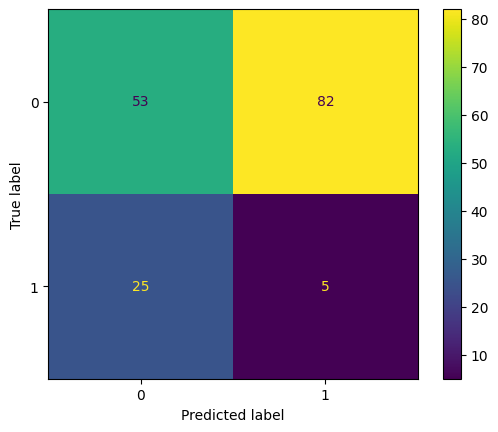

In [25]:
cm=confusion_matrix(testy,Pred_test_y)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

## Comment on the results after PCA and logistic regression
The above result show that the reduced feature using PCA has performed well as expected

## SVM

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [32]:
svc=SVC(kernel="linear",gamma="scale",probability=True,C=1)
model=svc

#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [33]:
totalPredictPro=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]
for train_index,cv_index in k_fold.split(trainx_reduced):
    train_x_fold, x_cv_fold = trainx_reduced.iloc[train_index,:], trainx_reduced.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model.fit(train_x_fold,np.asarray(train_y_fold).ravel())

    predictpro_tr=model.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(np.asarray(train_y_fold).ravel(),predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=model.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(np.asarray(y_cv_fold).ravel(),predictpro_val)
    Score_cv.append(entropy_loss_val)





    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=model.predict_proba(trainx_reduced)
total_entropy_loss=log_loss(np.asarray(trainy).ravel(),predicty)

print(f"Total log_loss given as {total_entropy_loss}")


******************************************************
The log_loss on training dataset is 0.0871454771972849
The log_loss on training dataset is 0.11287029856027649
******************************************************
The log_loss on training dataset is 0.09723886939999801
The log_loss on training dataset is 0.18414604976326024
******************************************************
The log_loss on training dataset is 0.08368260411801798
The log_loss on training dataset is 0.1774523394446693
******************************************************
The log_loss on training dataset is 0.041716152712986794
The log_loss on training dataset is 0.17728134547276247
******************************************************
The log_loss on training dataset is 0.08207922745408323
The log_loss on training dataset is 0.17968801625550138
**********************************************
Total log_loss given as 0.10156795347534776


In [34]:
Pred_test_y=model.predict(testx_reduced)
print(classification_report(testy,Pred_test_y))

              precision    recall  f1-score   support

           0       0.77      0.22      0.34       135
           1       0.17      0.70      0.27        30

    accuracy                           0.31       165
   macro avg       0.47      0.46      0.31       165
weighted avg       0.66      0.31      0.33       165



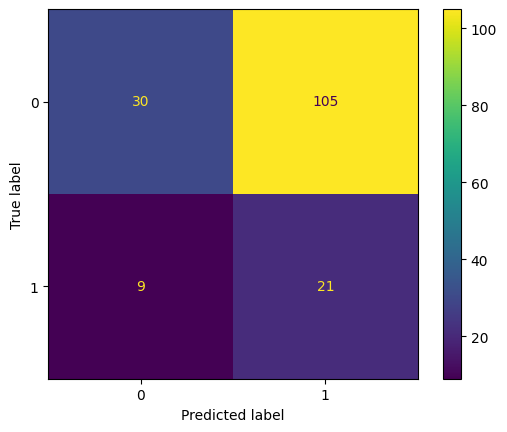

In [35]:
cm=confusion_matrix(testy,Pred_test_y)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

## Comment on the above training of classification model using the SVM
the precision recall are both infortant factor in this case, one step ahead we can focus on the f1-score

In [261]:
np.asarray(trainy).ravel()

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
kernels = ['poly','rbf','sigmoid']
Cs = np.logspace(0, 3, 25)
#Setting up the grid:
grid = {'kernel': kernels,'C':Cs}

#Setting the search:
# For scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

gridSearch = GridSearchCV(model, grid, scoring="accuracy", cv=k_fold, refit=True)
gridSearch.fit(trainx_reduced, np.asarray(trainy).ravel())
results = gridSearch.cv_results_

print('Best R^2 obtained:', gridSearch.best_score_)
print('gamma value for the best case:', gridSearch.best_estimator_.gamma)
print('kernel value for the best case:', gridSearch.best_estimator_.kernel)
print('C value for the best case:', gridSearch.best_estimator_.C)

Best R^2 obtained: 0.9509186725537673
gamma value for the best case: scale
kernel value for the best case: rbf
C value for the best case: 56.23413251903491


In [39]:
# best estimator
svc=gridSearch.best_estimator_

In [40]:
test_y_pred=svc.predict(testx_reduced)
print(classification_report(testy,test_y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       135
           1       0.00      0.00      0.00        30

    accuracy                           0.82       165
   macro avg       0.41      0.50      0.45       165
weighted avg       0.67      0.82      0.74       165



C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


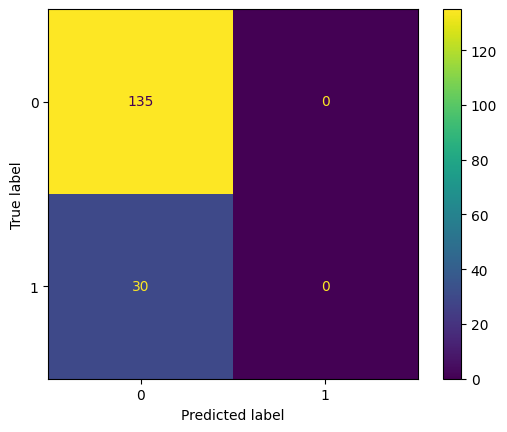

In [41]:
cm=confusion_matrix(testy,test_y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

## Randomforest

In [42]:
# Number of trees in the forest:
n_estimators = 7
# Number of features to consider when looking for the best split:
max_features="auto"
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 2
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 3
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2020
#-----------------------------------------------------------------
# Creating the classifier:
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state)

In [44]:
model=RFC

trainScore=[]
valScore=[]



for train_index,cv_index in k_fold.split(trainx_reduced):
    train_x_fold, x_cv_fold = trainx_reduced.iloc[train_index,:], trainx_reduced.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)



    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model.predict_proba(trainx_reduced)
loglosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {loglosstotal}")


C:\Users\ganes\AppData\Local\Temp\ipykernel_24016\1050542296.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x_fold,train_y_fold)
C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ganes\AppData\Local\Temp\ipykernel_24016\1050542296.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x_fold,train_y_fold)
C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarni

**************************************
Training Log Loss is 0.05040797060047686
CV Log Loss is 0.8045196719866181
**************************************
Training Log Loss is 0.05058748122333221
CV Log Loss is 0.5215103545736784
**************************************
Training Log Loss is 0.04589746044533769
CV Log Loss is 0.8039884709613218
**************************************
Training Log Loss is 0.04564061099574074
CV Log Loss is 0.49019452355522736
**************************************
Training Log Loss is 0.05073797665778106
CV Log Loss is 0.5004557389140758
************************************
RFC log loss 0.14052934035700743


C:\Users\ganes\AppData\Local\Temp\ipykernel_24016\1050542296.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x_fold,train_y_fold)
C:\Users\ganes\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [45]:
pred_test=model.predict(testx_reduced)
print(classification_report(testy,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.28      0.42       135
           1       0.18      0.70      0.28        30

    accuracy                           0.36       165
   macro avg       0.49      0.49      0.35       165
weighted avg       0.69      0.36      0.39       165



In [201]:
testy.value_counts()

0    135
1     30
Name: class, dtype: int64

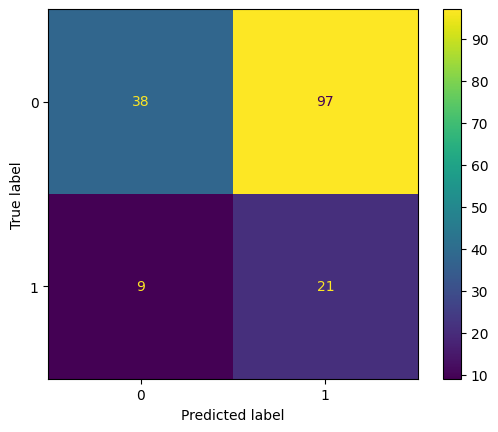

In [46]:
cm=confusion_matrix(testy,pred_test)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

## From the results we ahve seen that the PCA doesn't have the good score for perfrmace metric for it is not performing well.